Develop a web crawler to collect a website of your choice. Go to http://books.toscrape.com/ and extract the following information for all the books on that site.
• Full Title • More information URL • Price • Cover URL • Rating (number of stars)

##### HW_WebCrawling

##### First thing first, load all the necessary libraries:

In [ ]:
# Start with loading all necessary packages
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from pattern.en import sentiment
from textblob import TextBlob 
# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#regular expression
import re
#csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from lxml import html
import csv

#### Section 1: Data Acquisition

##### web crawler to collect a website of your choice. Go to http://books.toscrape.com/

In [893]:
r = requests.get('http://books.toscrape.com/')
data = html.fromstring(r.text)

##### First, scrape data (Full title,More information URL ,Price, Cover URL, Rating (number of stars)) from the main page.

In [952]:
web = "http://books.toscrape.com/?page=%s" 

# let's get the first four urls
for page in range(1,5):
    print(web % page)

http://books.toscrape.com/?page=1
http://books.toscrape.com/?page=2
http://books.toscrape.com/?page=3
http://books.toscrape.com/?page=4


In [953]:
web = "http://books.toscrape.com/?page=%s" 
for page in range(1,3):
    url = web % page
    data = html.fromstring(requests.get(url).text)
# collect Full title,More information URL ,Price, Cover URL, Rating (number of stars)
for review in data.xpath('//article[@class="product_pod"]'):
    title = review.xpath('h3/a/@title')
    url = review.xpath('.//h3/a/@href')
    price = review.xpath('div/p[@class="price_color"]/text()') 
    cover_url = review.xpath('.//img[@class="thumbnail"]/@src')
    rating= review.xpath('..//article/p/@class')
    print(title, url, price,cover_url ,rating)

['A Light in the Attic'] ['catalogue/a-light-in-the-attic_1000/index.html'] ['Â£51.77'] ['media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'] ['star-rating Three']
['Tipping the Velvet'] ['catalogue/tipping-the-velvet_999/index.html'] ['Â£53.74'] ['media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg'] ['star-rating One']
['Soumission'] ['catalogue/soumission_998/index.html'] ['Â£50.10'] ['media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg'] ['star-rating One']
['Sharp Objects'] ['catalogue/sharp-objects_997/index.html'] ['Â£47.82'] ['media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg'] ['star-rating Four']
['Sapiens: A Brief History of Humankind'] ['catalogue/sapiens-a-brief-history-of-humankind_996/index.html'] ['Â£54.23'] ['media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg'] ['star-rating Five']
['The Requiem Red'] ['catalogue/the-requiem-red_995/index.html'] ['Â£22.65'] ['media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg'] ['star-rating One']
['The Dirty Li

#### Collect Detailed Product Description for Individual Product Webpages

In [954]:
finaldata=[]
web = "http://books.toscrape.com/?page=%s" 
for page in range(1,3):
    url = web % page
    data = html.fromstring(requests.get(url).text)
# collect Full title,More information URL ,Price, Cover URL, Rating (number of stars)
for review in data.xpath('//article[@class="product_pod"]'):
    title = review.xpath('h3/a/@title')
    url = review.xpath('.//h3/a/@href')
    price = review.xpath('div/p[@class="price_color"]/text()') 
    cover_url = review.xpath('.//img[@class="thumbnail"]/@src')
    rating= review.xpath('..//article/p/@class')
    print(title, url, price,cover_url, rating)
    finaldata.append([title, url, price,cover_url, rating])
        
len(finaldata)

['A Light in the Attic'] ['catalogue/a-light-in-the-attic_1000/index.html'] ['Â£51.77'] ['media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'] ['star-rating Three']
['Tipping the Velvet'] ['catalogue/tipping-the-velvet_999/index.html'] ['Â£53.74'] ['media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg'] ['star-rating One']
['Soumission'] ['catalogue/soumission_998/index.html'] ['Â£50.10'] ['media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg'] ['star-rating One']
['Sharp Objects'] ['catalogue/sharp-objects_997/index.html'] ['Â£47.82'] ['media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg'] ['star-rating Four']
['Sapiens: A Brief History of Humankind'] ['catalogue/sapiens-a-brief-history-of-humankind_996/index.html'] ['Â£54.23'] ['media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg'] ['star-rating Five']
['The Requiem Red'] ['catalogue/the-requiem-red_995/index.html'] ['Â£22.65'] ['media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg'] ['star-rating One']
['The Dirty Li

20

#### Section 2: Data cleaning & transformation

In [955]:
# convert to dataframe
# to view entire column
pd.set_option('display.max_colwidth', -1)
# convert list to data frame (excel-like)
df = pd.DataFrame(finaldata)
df.head(2)

,0,1,2,3,4
0,[A Light in the Attic],[catalogue/a-light-in-the-attic_1000/index.html],[Â£51.77],[media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg],[star-rating Three]
1,[Tipping the Velvet],[catalogue/tipping-the-velvet_999/index.html],[Â£53.74],[media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg],[star-rating One]


In [956]:
#Convert list to str with astype(str) and then remove ', [, ] characters
df[0] = df[0].astype(str).str.replace('\[|\]', '')
df[1] = df[1].astype(str).str.replace('\[|\]', '')
df[2] = df[2].astype(str).str.replace('\[|\]', '')
df[3] = df[3].astype(str).str.replace('\[|\]', '')
df[4] = df[4].astype(str).str.replace('\[|\]', '')
df

,0,1,2,3,4
0,'A Light in the Attic','catalogue/a-light-in-the-attic_1000/index.html','Â£51.77','media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg','star-rating Three'
1,'Tipping the Velvet','catalogue/tipping-the-velvet_999/index.html','Â£53.74','media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg','star-rating One'
2,'Soumission','catalogue/soumission_998/index.html','Â£50.10','media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg','star-rating One'
3,'Sharp Objects','catalogue/sharp-objects_997/index.html','Â£47.82','media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg','star-rating Four'
4,'Sapiens: A Brief History of Humankind','catalogue/sapiens-a-brief-history-of-humankind_996/index.html','Â£54.23','media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg','star-rating Five'
5,'The Requiem Red','catalogue/the-requiem-red_995/index.html','Â£22.65','media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg','star-rating One'
6,'The Dirty Little Secrets of Getting Your Dream Job','catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html','Â£33.34','media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg','star-rating Four'
7,"'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull'",'catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html','Â£17.93','media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg','star-rating Three'
8,'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics','catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html','Â£22.60','media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg','star-rating Four'
9,'The Black Maria','catalogue/the-black-maria_991/index.html','Â£52.15','media/cache/58/46/5846057e28022268153beff6d352b06c.jpg','star-rating One'


In [957]:
# remove "price "Â"
df[2] = df[2].str.replace('Â','')
df.head()

,0,1,2,3,4
0,'A Light in the Attic','catalogue/a-light-in-the-attic_1000/index.html','£51.77','media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg','star-rating Three'
1,'Tipping the Velvet','catalogue/tipping-the-velvet_999/index.html','£53.74','media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg','star-rating One'
2,'Soumission','catalogue/soumission_998/index.html','£50.10','media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg','star-rating One'
3,'Sharp Objects','catalogue/sharp-objects_997/index.html','£47.82','media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg','star-rating Four'
4,'Sapiens: A Brief History of Humankind','catalogue/sapiens-a-brief-history-of-humankind_996/index.html','£54.23','media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg','star-rating Five'


In [958]:
# remove "review_icon icon small"
df[2] = df[2].str.replace('£','')
df.head()

,0,1,2,3,4
0,'A Light in the Attic','catalogue/a-light-in-the-attic_1000/index.html','51.77','media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg','star-rating Three'
1,'Tipping the Velvet','catalogue/tipping-the-velvet_999/index.html','53.74','media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg','star-rating One'
2,'Soumission','catalogue/soumission_998/index.html','50.10','media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg','star-rating One'
3,'Sharp Objects','catalogue/sharp-objects_997/index.html','47.82','media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg','star-rating Four'
4,'Sapiens: A Brief History of Humankind','catalogue/sapiens-a-brief-history-of-humankind_996/index.html','54.23','media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg','star-rating Five'


In [959]:
#Remove "\" (newlines) from the dataset
df[0] = df[0].str.replace(r'\'','')
df[1] = df[1].str.replace(r'\'','')
df[2] = df[2].str.replace(r'\'','')
df[3] = df[3].str.replace(r'\'','')
df[4] = df[4].str.replace(r'\'','')
df

,0,1,2,3,4
0,A Light in the Attic,catalogue/a-light-in-the-attic_1000/index.html,51.77,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg,star-rating Three
1,Tipping the Velvet,catalogue/tipping-the-velvet_999/index.html,53.74,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg,star-rating One
2,Soumission,catalogue/soumission_998/index.html,50.10,media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg,star-rating One
3,Sharp Objects,catalogue/sharp-objects_997/index.html,47.82,media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg,star-rating Four
4,Sapiens: A Brief History of Humankind,catalogue/sapiens-a-brief-history-of-humankind_996/index.html,54.23,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg,star-rating Five
5,The Requiem Red,catalogue/the-requiem-red_995/index.html,22.65,media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg,star-rating One
6,The Dirty Little Secrets of Getting Your Dream Job,catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html,33.34,media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg,star-rating Four
7,"The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull",catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html,17.93,media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg,star-rating Three
8,The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html,22.60,media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg,star-rating Four
9,The Black Maria,catalogue/the-black-maria_991/index.html,52.15,media/cache/58/46/5846057e28022268153beff6d352b06c.jpg,star-rating One


In [960]:
#Changing data type
df.dtypes

0    object
1    object
2    object
3    object
4    object
dtype: object

In [961]:
# rename columns (title, url, price,cover_url,rating)

df.columns = ['title','url','price','cover_url','rating']
df.head(2)

,title,url,price,cover_url,rating
0,A Light in the Attic,catalogue/a-light-in-the-attic_1000/index.html,51.77,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg,star-rating Three
1,Tipping the Velvet,catalogue/tipping-the-velvet_999/index.html,53.74,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg,star-rating One


In [962]:
#Changing data type
df["price"] =df.price.astype(float)

In [963]:
#Changing data type to flaot
df.dtypes

title        object 
url          object 
price        float64
cover_url    object 
rating       object 
dtype: object

In [964]:
df.head(2)

,title,url,price,cover_url,rating
0,A Light in the Attic,catalogue/a-light-in-the-attic_1000/index.html,51.77,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg,star-rating Three
1,Tipping the Velvet,catalogue/tipping-the-velvet_999/index.html,53.74,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg,star-rating One


In [965]:
# focus on the url column only and convert it to list

urls = df['url'].tolist()
for i in urls:
    print(i)

catalogue/a-light-in-the-attic_1000/index.html
catalogue/tipping-the-velvet_999/index.html
catalogue/soumission_998/index.html
catalogue/sharp-objects_997/index.html
catalogue/sapiens-a-brief-history-of-humankind_996/index.html
catalogue/the-requiem-red_995/index.html
catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html
catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html
catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html
catalogue/the-black-maria_991/index.html
catalogue/starving-hearts-triangular-trade-trilogy-1_990/index.html
catalogue/shakespeares-sonnets_989/index.html
catalogue/set-me-free_988/index.html
catalogue/scott-pilgrims-precious-little-life-scott-pilgrim-1_987/index.html
catalogue/rip-it-up-and-start-again_986/index.html
catalogue/our-band-could-be-your-life-scenes-from-the-american-indie-underground-1981-1991_985/index.html

In [966]:
# to test xpath, I will use the first url only
url = urls[0]
print(url)

catalogue/a-light-in-the-attic_1000/index.html


In [967]:
url = 'http://books.toscrape.com/' + url
url

'http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'

In [968]:
r = requests.get(url)
data = html.fromstring(r.text)

In [969]:
proddesc = data.xpath('//div[@id="product_description"]/following-sibling::p/text()')
print(proddesc)

["It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sound

In [970]:
# let's crawl the first ten urls (products) only

for i in urls[:10]:
    print(i)

catalogue/a-light-in-the-attic_1000/index.html
catalogue/tipping-the-velvet_999/index.html
catalogue/soumission_998/index.html
catalogue/sharp-objects_997/index.html
catalogue/sapiens-a-brief-history-of-humankind_996/index.html
catalogue/the-requiem-red_995/index.html
catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html
catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html
catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html
catalogue/the-black-maria_991/index.html


In [971]:
review = []

# let's crawl the first ten urls only

for url in urls[:5]:
    r = requests.get('http://books.toscrape.com/' + url)
    data = html.fromstring(r.text)
    
    proddesc = data.xpath('//div[@id="product_description"]/following-sibling::p/text()')
    print(proddesc)

len(review)

["It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sound

0

In [972]:
alldesc = []

# let's crawl all the products

for url in urls[:5]:
    r = requests.get('http://books.toscrape.com/' + url)
    data = html.fromstring(r.text)
    
    proddesc = data.xpath('//div[@id="product_description"]/following-sibling::p/text()')
    print(proddesc)
    alldesc.append([proddesc])

len(alldesc)

["It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sound

5

#### Section 3: Descriptive analytics (Business intelligence)

In [973]:
# pivot table (or groupby) by price
by_price = df.groupby("price").size()
by_price

price
13.99    1
17.46    1
17.93    1
20.66    1
22.60    1
22.65    1
23.88    1
33.34    1
35.02    1
37.59    1
45.17    1
47.82    1
50.10    1
51.33    1
51.77    1
52.15    1
52.29    1
53.74    1
54.23    1
57.25    1
dtype: int64

In [974]:
# how many star per column? 
df_count_user = df.groupby('rating').size().reset_index()
df_count_user

,rating,0
0,star-rating Five,4
1,star-rating Four,4
2,star-rating One,6
3,star-rating Three,3
4,star-rating Two,3


In [975]:
# pivot table (or groupby) by price
by_price = df.groupby("price").count()
by_price

,title,url,cover_url,rating
price,,,,
13.99,1,1,1,1
17.46,1,1,1,1
17.93,1,1,1,1
20.66,1,1,1,1
22.60,1,1,1,1
22.65,1,1,1,1
23.88,1,1,1,1
33.34,1,1,1,1
35.02,1,1,1,1


In [976]:
# pivot table (or groupby) by rating
by_date = df.groupby("rating").count()
by_date

,title,url,price,cover_url
rating,,,,
star-rating Five,4,4,4,4
star-rating Four,4,4,4,4
star-rating One,6,6,6,6
star-rating Three,3,3,3,3
star-rating Two,3,3,3,3


In [977]:
# price per column? 
df_count_user = df.groupby('price').size().reset_index()
df_count_user

,price,0
0,13.99,1
1,17.46,1
2,17.93,1
3,20.66,1
4,22.60,1
5,22.65,1
6,23.88,1
7,33.34,1
8,35.02,1
9,37.59,1


##### simple line plots,

In [978]:
%matplotlib inline
import matplotlib.pyplot as plt

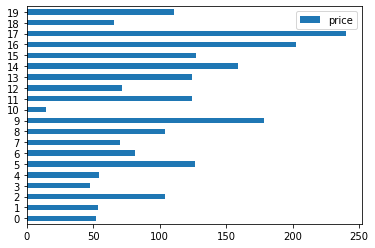

In [979]:
# plot how many tweets per each person?
df.groupby('rating').cumsum().plot.barh(stacked=True);

##### word frequency and word cloud,

In [980]:
# convert alldesc to dataframe
df = pd.DataFrame(alldesc)
df.head()

,0
0,"[It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sounded so good. ...more]"
1,"[""Erotic and absorbing...Written with starling power.""--""The New York Times Book Review "" Nan King, an oyster girl, is captivated by the music hall phenomenon Kitty Butler, a male impersonator extraordinaire treading the boards in Canterbury. Through a friend at the box office, Nan manages to visit all her shows and finally meet her heroine. Soon after, she becomes Kitty's ""Erotic and absorbing...Written with starling power.""--""The New York Times Book Review "" Nan King, an oyster girl, is captivated by the music hall phenomenon Kitty Butler, a male impersonator extraordinaire treading the boards in Canterbury. Through a friend at the box office, Nan manages to visit all her shows and finally meet her heroine. Soon after, she becomes Kitty's dresser and the two head for the bright lights of Leicester Square where they begin a glittering career as music-hall stars in an all-singing and dancing double act. At the same time, behind closed doors, they admit their attraction to each other and their affair begins. ...more]"
2,"[Dans une France assez proche de la nÃ´tre, un homme sâengage dans la carriÃ¨re universitaire. Peu motivÃ© par lâenseignement, il sâattend Ã une vie ennuyeuse mais calme, protÃ©gÃ©e des grands drames historiques. Cependant les forces en jeu dans le pays ont fissurÃ© le systÃ¨me politique jusquâÃ provoquer son effondrement. Cette implosion sans soubresauts, sans vraie rÃ©volution, s Dans une France assez proche de la nÃ´tre, un homme sâengage dans la carriÃ¨re universitaire. Peu motivÃ© par lâenseignement, il sâattend Ã une vie ennuyeuse mais calme, protÃ©gÃ©e des grands drames historiques. Cependant les forces en jeu dans le pays ont fissurÃ© le systÃ¨me politique jusquâÃ provoquer son effondrement. Cette implosion sans soubresauts, sans vraie rÃ©volution, se dÃ©veloppe comme un mauvais rÃªve.Le talent de lâauteur, sa force visionnaire nous entraÃ®nent sur un terrain ambigu et glissant ; son regard sur notre civilisation vieillissante fait coexister dans ce roman les intuitions poÃ©tiques, les effets comiques, une mÃ©lancolie fataliste.Ce livre est une saisissante fable politique et morale. ...more]"
3,"[WICKED above her hipbone, GIRL across her heart Words are like a road map to reporter Camille Preakerâs troubled past. Fresh from a brief stay at a psych hospital, Camilleâs first assignment from the second-rate daily paper where she works brings her reluctantly back to her hometown to cover the murders of two preteen girls. NASTY on her kneecap, BABYDOLL on her leg Since WICKED above her hipbone, GIRL across her heart Words are like a road map to reporter Camille Preakerâs troubled past. Fresh from a brief stay at a psych hospital, Camilleâs first assignment from the second-rate daily paper where she works brings her reluctantly back to her hometown to cover the murders of two preteen girls. NASTY on her kneecap, BABYDOLL on her leg Since she left town eight years ag

In [981]:
#Export to csv
df.to_csv("../WebCrawling/web_review.csv", index=False, encoding='utf-8')
df.head()

,0
0,"[It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sounded so good. ...more]"
1,"[""Erotic and absorbing...Written with starling power.""--""The New York Times Book Review "" Nan King, an oyster girl, is captivated by the music hall phenomenon Kitty Butler, a male impersonator extraordinaire treading the boards in Canterbury. Through a friend at the box office, Nan manages to visit all her shows and finally meet her heroine. Soon after, she becomes Kitty's ""Erotic and absorbing...Written with starling power.""--""The New York Times Book Review "" Nan King, an oyster girl, is captivated by the music hall phenomenon Kitty Butler, a male impersonator extraordinaire treading the boards in Canterbury. Through a friend at the box office, Nan manages to visit all her shows and finally meet her heroine. Soon after, she becomes Kitty's dresser and the two head for the bright lights of Leicester Square where they begin a glittering career as music-hall stars in an all-singing and dancing double act. At the same time, behind closed doors, they admit their attraction to each other and their affair begins. ...more]"
2,"[Dans une France assez proche de la nÃ´tre, un homme sâengage dans la carriÃ¨re universitaire. Peu motivÃ© par lâenseignement, il sâattend Ã une vie ennuyeuse mais calme, protÃ©gÃ©e des grands drames historiques. Cependant les forces en jeu dans le pays ont fissurÃ© le systÃ¨me politique jusquâÃ provoquer son effondrement. Cette implosion sans soubresauts, sans vraie rÃ©volution, s Dans une France assez proche de la nÃ´tre, un homme sâengage dans la carriÃ¨re universitaire. Peu motivÃ© par lâenseignement, il sâattend Ã une vie ennuyeuse mais calme, protÃ©gÃ©e des grands drames historiques. Cependant les forces en jeu dans le pays ont fissurÃ© le systÃ¨me politique jusquâÃ provoquer son effondrement. Cette implosion sans soubresauts, sans vraie rÃ©volution, se dÃ©veloppe comme un mauvais rÃªve.Le talent de lâauteur, sa force visionnaire nous entraÃ®nent sur un terrain ambigu et glissant ; son regard sur notre civilisation vieillissante fait coexister dans ce roman les intuitions poÃ©tiques, les effets comiques, une mÃ©lancolie fataliste.Ce livre est une saisissante fable politique et morale. ...more]"
3,"[WICKED above her hipbone, GIRL across her heart Words are like a road map to reporter Camille Preakerâs troubled past. Fresh from a brief stay at a psych hospital, Camilleâs first assignment from the second-rate daily paper where she works brings her reluctantly back to her hometown to cover the murders of two preteen girls. NASTY on her kneecap, BABYDOLL on her leg Since WICKED above her hipbone, GIRL across her heart Words are like a road map to reporter Camille Preakerâs troubled past. Fresh from a brief stay at a psych hospital, Camilleâs first assignment from the second-rate daily paper where she works brings her reluctantly back to her hometown to cover the murders of two preteen girls. NASTY on her kneecap, BABYDOLL on her leg Since she left town eight years ag

In [982]:
df.head()

,0
0,"[It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sounded so good. ...more]"
1,"[""Erotic and absorbing...Written with starling power.""--""The New York Times Book Review "" Nan King, an oyster girl, is captivated by the music hall phenomenon Kitty Butler, a male impersonator extraordinaire treading the boards in Canterbury. Through a friend at the box office, Nan manages to visit all her shows and finally meet her heroine. Soon after, she becomes Kitty's ""Erotic and absorbing...Written with starling power.""--""The New York Times Book Review "" Nan King, an oyster girl, is captivated by the music hall phenomenon Kitty Butler, a male impersonator extraordinaire treading the boards in Canterbury. Through a friend at the box office, Nan manages to visit all her shows and finally meet her heroine. Soon after, she becomes Kitty's dresser and the two head for the bright lights of Leicester Square where they begin a glittering career as music-hall stars in an all-singing and dancing double act. At the same time, behind closed doors, they admit their attraction to each other and their affair begins. ...more]"
2,"[Dans une France assez proche de la nÃ´tre, un homme sâengage dans la carriÃ¨re universitaire. Peu motivÃ© par lâenseignement, il sâattend Ã une vie ennuyeuse mais calme, protÃ©gÃ©e des grands drames historiques. Cependant les forces en jeu dans le pays ont fissurÃ© le systÃ¨me politique jusquâÃ provoquer son effondrement. Cette implosion sans soubresauts, sans vraie rÃ©volution, s Dans une France assez proche de la nÃ´tre, un homme sâengage dans la carriÃ¨re universitaire. Peu motivÃ© par lâenseignement, il sâattend Ã une vie ennuyeuse mais calme, protÃ©gÃ©e des grands drames historiques. Cependant les forces en jeu dans le pays ont fissurÃ© le systÃ¨me politique jusquâÃ provoquer son effondrement. Cette implosion sans soubresauts, sans vraie rÃ©volution, se dÃ©veloppe comme un mauvais rÃªve.Le talent de lâauteur, sa force visionnaire nous entraÃ®nent sur un terrain ambigu et glissant ; son regard sur notre civilisation vieillissante fait coexister dans ce roman les intuitions poÃ©tiques, les effets comiques, une mÃ©lancolie fataliste.Ce livre est une saisissante fable politique et morale. ...more]"
3,"[WICKED above her hipbone, GIRL across her heart Words are like a road map to reporter Camille Preakerâs troubled past. Fresh from a brief stay at a psych hospital, Camilleâs first assignment from the second-rate daily paper where she works brings her reluctantly back to her hometown to cover the murders of two preteen girls. NASTY on her kneecap, BABYDOLL on her leg Since WICKED above her hipbone, GIRL across her heart Words are like a road map to reporter Camille Preakerâs troubled past. Fresh from a brief stay at a psych hospital, Camilleâs first assignment from the second-rate daily paper where she works brings her reluctantly back to her hometown to cover the murders of two preteen girls. NASTY on her kneecap, BABYDOLL on her leg Since she left town eight years ag

In [983]:
#Rename the columns
df.columns = ['cleaned']
df.head()

,cleaned
0,"[It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sounded so good. ...more]"
1,"[""Erotic and absorbing...Written with starling power.""--""The New York Times Book Review "" Nan King, an oyster girl, is captivated by the music hall phenomenon Kitty Butler, a male impersonator extraordinaire treading the boards in Canterbury. Through a friend at the box office, Nan manages to visit all her shows and finally meet her heroine. Soon after, she becomes Kitty's ""Erotic and absorbing...Written with starling power.""--""The New York Times Book Review "" Nan King, an oyster girl, is captivated by the music hall phenomenon Kitty Butler, a male impersonator extraordinaire treading the boards in Canterbury. Through a friend at the box office, Nan manages to visit all her shows and finally meet her heroine. Soon after, she becomes Kitty's dresser and the two head for the bright lights of Leicester Square where they begin a glittering career as music-hall stars in an all-singing and dancing double act. At the same time, behind closed doors, they admit their attraction to each other and their affair begins. ...more]"
2,"[Dans une France assez proche de la nÃ´tre, un homme sâengage dans la carriÃ¨re universitaire. Peu motivÃ© par lâenseignement, il sâattend Ã une vie ennuyeuse mais calme, protÃ©gÃ©e des grands drames historiques. Cependant les forces en jeu dans le pays ont fissurÃ© le systÃ¨me politique jusquâÃ provoquer son effondrement. Cette implosion sans soubresauts, sans vraie rÃ©volution, s Dans une France assez proche de la nÃ´tre, un homme sâengage dans la carriÃ¨re universitaire. Peu motivÃ© par lâenseignement, il sâattend Ã une vie ennuyeuse mais calme, protÃ©gÃ©e des grands drames historiques. Cependant les forces en jeu dans le pays ont fissurÃ© le systÃ¨me politique jusquâÃ provoquer son effondrement. Cette implosion sans soubresauts, sans vraie rÃ©volution, se dÃ©veloppe comme un mauvais rÃªve.Le talent de lâauteur, sa force visionnaire nous entraÃ®nent sur un terrain ambigu et glissant ; son regard sur notre civilisation vieillissante fait coexister dans ce roman les intuitions poÃ©tiques, les effets comiques, une mÃ©lancolie fataliste.Ce livre est une saisissante fable politique et morale. ...more]"
3,"[WICKED above her hipbone, GIRL across her heart Words are like a road map to reporter Camille Preakerâs troubled past. Fresh from a brief stay at a psych hospital, Camilleâs first assignment from the second-rate daily paper where she works brings her reluctantly back to her hometown to cover the murders of two preteen girls. NASTY on her kneecap, BABYDOLL on her leg Since WICKED above her hipbone, GIRL across her heart Words are like a road map to reporter Camille Preakerâs troubled past. Fresh from a brief stay at a psych hospital, Camilleâs first assignment from the second-rate daily paper where she works brings her reluctantly back to her hometown to cover the murders of two preteen girls. NASTY on her kneecap, BABYDOLL on her leg Since she left town eight ye

In [984]:
#Changing data type
df.dtypes

cleaned    object
dtype: object

In [985]:
#Changing data type float to string
df['cleaned'] = df['cleaned'].astype(str)

In [986]:
df.dtypes

cleaned    object
dtype: object

In [987]:
# if you want text preprocessing before word cloud, run this first

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("only")
stopwords.add("hours")
stopwords.add("years")
df['cleaned'] = df.cleaned.str.lower()
df['cleaned'] = df.cleaned.str.replace('http\S+|www.\S+', '')   # remove http # \S Matches any character that is not a whitespace character (spaces, tabs, line breaks).
df['cleaned'] = df.cleaned.str.replace("[^a-zA-Z]", " ")   # # remove numbers and other non-English words
df['cleaned'] = df.cleaned.str.findall('\w{3,}').str.join(' ')   # remove short words
df['cleaned'] =df.cleaned.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))   # remove stopwords
df.head()

,cleaned
0,hard imagine world without light attic now classic collection poetry drawings shel silverstein celebrates anniversary special edition silverstein humorous creative verse amuse dowdiest readers lemon faced adults fidgety kids sit still read rhythmic words laugh smile love hard imagine world without light attic now classic collection poetry drawings shel silverstein celebrates anniversary special edition silverstein humorous creative verse amuse dowdiest readers lemon faced adults fidgety kids sit still read rhythmic words laugh smile love silverstein need proof genius rockabyerockabye baby treetopdon know treetopis safe place rock put cradle baby think someone sgot shel never sounded good
1,erotic absorbing written starling power new york times book review nan king oyster girl captivated music hall phenomenon kitty butler male impersonator extraordinaire treading boards canterbury friend box office nan manages visit shows finally meet heroine soon becomes kitty erotic absorbing written starling power new york times book review nan king oyster girl captivated music hall phenomenon kitty butler male impersonator extraordinaire treading boards canterbury friend box office nan manages visit shows finally meet heroine soon becomes kitty dresser two head bright lights leicester square begin glittering career music hall stars singing dancing double act time behind closed doors admit attraction affair begins
2,dans une france assez proche tre homme engage dans carri universitaire peu motiv par enseignement attend une vie ennuyeuse mais calme prot des grands drames historiques cependant les forces jeu dans pays ont fissur syst politique jusqu provoquer son effondrement cette implosion sans soubresauts sans vraie volution dans une france assez proche tre homme engage dans carri universitaire peu motiv par enseignement attend une vie ennuyeuse mais calme prot des grands drames historiques cependant les forces jeu dans pays ont fissur syst politique jusqu provoquer son effondrement cette implosion sans soubresauts sans vraie volution veloppe comme mauvais talent auteur force visionnaire nous entra nent sur terrain ambigu glissant son regard sur notre civilisation vieillissante fait coexister dans roman les intuitions tiques les effets comiques une lancolie fataliste livre est une saisissante fable politique morale
3,wicked hipbone girl across heart words road map reporter camille preaker troubled past fresh brief stay psych hospital camille first assignment second rate daily paper works brings reluctantly back hometown cover murders two preteen girls nasty kneecap babydoll leg wicked hipbone girl across heart words road map reporter camille preaker troubled past fresh brief stay psych hospital camille first assignment second rate daily paper works brings reluctantly back hometown cover murders two preteen girls nasty kneecap babydoll leg left town eight ago camille hardly spoken neurotic hypochondriac mother half sister barely knows beautiful thirteen year old eerie grip town now installed family victorian mansion camille haunted childhood tragedy spent whole life trying cut memory harmful wrist whore ankle camille works uncover truth violent crimes finds identifying young victims bit strongly clues keep leading dead ends forcing camille unravel psychological puzzle past story dogged demons camille will confront happened wants survive homecoming taut crafted writing sharp objects addictive haunting unforgettable
4,renowned historian comes groundbreaking narrative humanity creation evolution international bestseller explores ways biology history defined enhanced understanding means chuman done hundred thousand ago least six different species humans inhabited earth yet today one renowned historian comes groundbreaking narrative humanity creation evolution international bestseller explores ways biology history defined enhanced understanding means chuman done hundred thousand ago least six different species humans inhabited earth ye

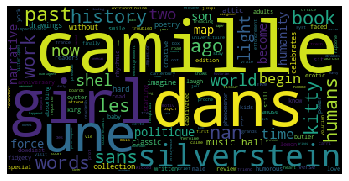

In [988]:
# word cloud auto
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud().generate(' '.join(df['cleaned']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

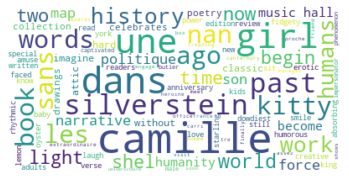

In [989]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(df['cleaned']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

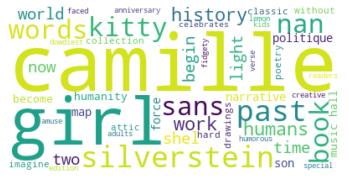

In [990]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["une", "shels", "ago","les","dans"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_font_size=100, max_words=50, background_color="white").generate(' '.join(df['cleaned']))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [991]:
# using collections python library to count
from collections import Counter

In [992]:
list(Counter(" ".join(df['cleaned']).split(" ")).items())[:20]

[('hard', 2),
 ('imagine', 2),
 ('world', 3),
 ('without', 2),
 ('light', 2),
 ('attic', 2),
 ('now', 3),
 ('classic', 2),
 ('collection', 2),
 ('poetry', 2),
 ('drawings', 2),
 ('shel', 3),
 ('silverstein', 5),
 ('celebrates', 2),
 ('anniversary', 2),
 ('special', 2),
 ('edition', 2),
 ('humorous', 2),
 ('creative', 2),
 ('verse', 2)]

In [993]:
fdist = list(Counter(" ".join(df['cleaned']).split(" ")).items())

In [994]:
freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)
wordlist

,0,1
0,hard,2
1,imagine,2
2,world,3
3,without,2
4,light,2
...,...,...
413,ridley,1
414,robert,1
415,wright,1
416,sharon,1


In [995]:
# top five words
wordlist.sort_values(1, ascending=False).head(5)

,0,1
197,camille,9
115,dans,7
116,une,6
12,silverstein,5
200,past,5


In [ ]:
alldata =[]

web = "https://www.hrdive.com/?page=%s"

for page in range(1,3):
    url = web % page
    data = html.fromstring(requests.get(url).text)
    #xpath
    for i in data.xpath("//li[contains(@class,'row feed__item')]/div[2][@class='medium-8 columns ']"):
        url = i.xpath('..//div[2]/h3/a/@href')
        title = i.xpath('..//div[2]/h3/a/text()')
        print(url,title)
        alldata.append([url,title])
    
len(alldata)